# Non-normal regression and heteroskedasticity

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats

### Regression models

In full generality, a regression model is of the following form

$$
Y_i = f(X_i; \boldsymbol{\beta}) + \epsilon_i
$$

where $f(\cdot; \boldsymbol{\beta})$ is the model, $\boldsymbol{\beta}$ are a vector of model parameters and $\epsilon_i$ is the measurement error. $Y_i$ is called the dependent variables, and $X_i$ the independent variables. We assume that there is only error in the measurements $Y_i$, and not in $X_i$ (e.g. we assume we know the number of over-65s exactly in a given LAD, but we do asume there is an error in the dementia case rate). Furthermore, we assume that $\epsilon_i$ are [i.i.d](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables), so the error in all measurements $Y_i$ are identically and independently distributed.

As the formula suggests, the measurements $Y_i$ are equal to the true value plus the error. In the absence of any error, the assumption is that the true values fit exactly onto the model $f(X_i; \boldsymbol{\beta})$. So we would have $Y_i = f(X_i; \boldsymbol{\beta})$. In the real world this is however rarely the case, and this discrepancy is explained by the presence of measurement errors $\epsilon_i$. For any measurement $Y_i$ the true value is thus $Y_i - \epsilon_i$. However, we can of course never measure $\epsilon_i$, so the true values will always elude us.

A regression model is thus defined by:

1. The model (in the absence of error) $f(X_i; \boldsymbol{\beta})$
2. The distribution of the error $\epsilon_i$

### Our model

For our dementia case-rate analysis, we have to make these two choices.

1. In the absence of any measurement error (that is, presuming that everyone in the UK would be perfectly diagnosed), what is the relationship between the various factors $X$ (age, comorbidities etc) and the true case rates $Y_i - \epsilon_i$.
2. The residual = true case rates - diagnosis rates. How is the residual distributed?

Our choice of 1 is a linear model. So we assume that $f(X_i;\beta) = X_i \beta$.

For 2, we assume that there is 0 probability of over-diagnosis. So the PDF $p(\epsilon)$ of $\epsilon_i$ should satisfy $p(\epsilon) = 0$ for $\epsilon > 0$.

Here the indices $i$ refer to each LAD, $Y_i$ are the reported diagnosis rates.

---

Below are some examples of what the measured values of $Y_i$ would look like depending on how $\epsilon_i$ are distributed.

The red line represents the true values $Y_i - \epsilon_i$. The regression line is not plotted, but in principle (if the regression works) it should look like $Y_i - \epsilon_i$.

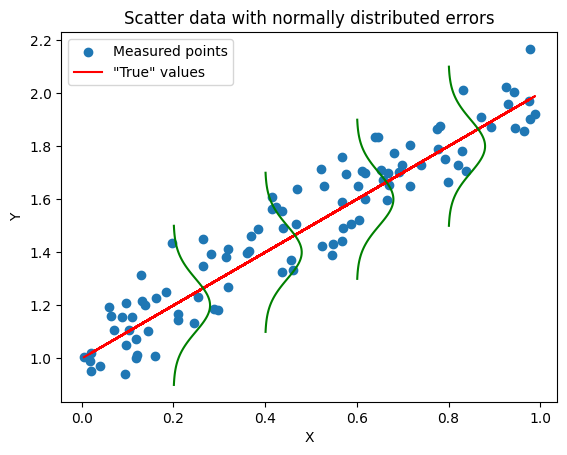

In [ ]:
#|code-fold:true
def f(x, k, m):
    return k*x + m

k,m = 1, 1

# Parameters for the normal distribution
mu = 0  # mean
sigma = 0.1  # standard deviation

# Generating random data
np.random.seed(0)
N = 100
x = np.random.rand(N)
e = np.random.normal(mu, sigma, N)
y_true = f(x, k,m)
y = f(x, k,m) + e

# Fitting a regression line


# Plotting the scatter data and regression line again
plt.scatter(x, y, label='Measured points')
plt.plot(x, y_true, color='red', label='"True" values')

# X positions for the PDFs
x_positions = [0.2, 0.4, 0.6, 0.8]

# Generating PDFs for the specified x positions
for xpos in x_positions:
    # Create a range of y values for plotting the PDF
    y_range = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = norm.pdf(y_range, mu, sigma)
    
    # Scaling the PDF to make it visible on the plot, adjust scale factor as needed
    scale_factor = 0.02
    pdf_scaled = pdf * scale_factor + xpos
    
    # Plotting the PDF
    plt.plot(pdf_scaled, y_range + f(xpos, k, m), color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter data with normally distributed errors')
# To avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


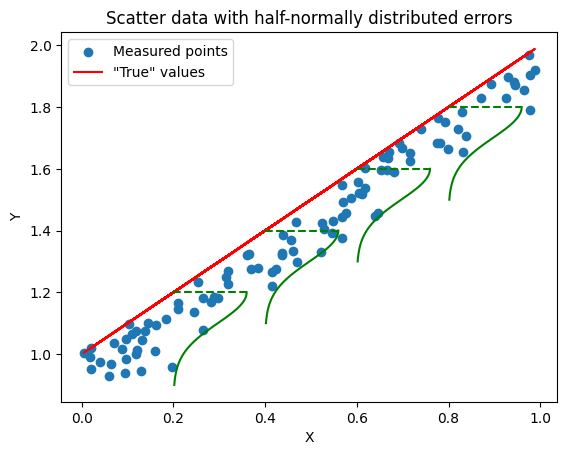

In [ ]:
#|code-fold:true
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

def f(x, k, m):
    return k*x + m

# Parameters for the half-normal distribution
mu = 0  # mean of the underlying normal distribution
sigma = 0.1  # standard deviation of the underlying normal distribution

# Generating random data
np.random.seed(0)
N = 100
x = np.random.rand(N)
e = np.abs(np.random.normal(mu, sigma, N))  # Generating half-normally distributed errors
y_true = f(x, 1, 1)
y = f(x, 1, 1) - e

# Plotting the scatter data and regression line
plt.scatter(x, y, label='Measured points')
plt.plot(x, y_true, color='red', label='"True" values')

# X positions for the PDFs
x_positions = [0.2, 0.4, 0.6, 0.8]

# Generating PDFs for the specified x positions
for xpos in x_positions:
    # Create a range of y values for plotting the PDF
    y_range = np.linspace(0, 3*sigma, 100)  # Adjusted range for half-normal
    pdf = halfnorm.pdf(y_range, loc=mu, scale=sigma)
    
    # Scaling the PDF to make it visible on the plot, adjust scale factor as needed
    scale_factor = 0.02
    pdf_scaled = pdf * scale_factor + xpos
    
    # Plotting the PDF
    plt.plot(pdf_scaled, -y_range + f(xpos, 1, 1), color='green')  # Adjusted plotting for half-normal
    
    _xs = np.linspace(xpos, pdf_scaled[0], 100)
    _ys = [f(xpos, 1, 1)] * len(_xs)
    plt.plot(_xs, _ys, '--', color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter data with half-normally distributed errors')
# To avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


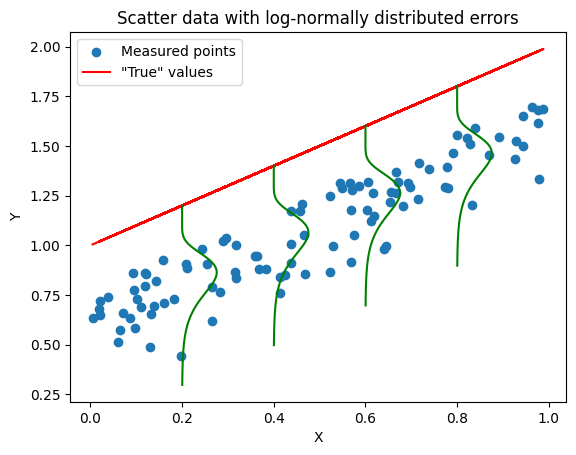

In [ ]:
#|code-fold:true
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def f(x, k, m):
    return k*x + m

# Parameters for the log-normal distribution
# For a log-normal distribution, the parameters s, scale, and loc are used where:
# s is the sigma (standard deviation) of the log of the distribution,
# scale is exp(mu) where mu is the mean of the log of the distribution,
# loc is usually set to 0 for a standard log-normal distribution.
s = 0.3  # standard deviation of the log of the distribution
mu = -1  # mean of the log of the distribution, exp(mu) is the scale parameter

# Generating random data
np.random.seed(0)
N = 100
x = np.random.rand(N)
# Generating log-normally distributed errors, scale=exp(mu) is used for the mean of the underlying normal distribution
e = np.random.lognormal(mu, s, N)
y_true = f(x, 1, 1)
y = f(x, 1, 1) - e

# Plotting the scatter data and regression line
plt.scatter(x, y, label='Measured points')
plt.plot(x, y_true, color='red', label='"True" values')

# X positions for the PDFs
x_positions = [0.2, 0.4, 0.6, 0.8]

# Generating PDFs for the specified x positions
for xpos in x_positions:
    # Create a range of y values for plotting the PDF, focusing on the positive range relevant for log-normal
    y_range = np.linspace(0, np.max(e) * 1.2, 100)
    pdf = lognorm.pdf(y_range, s=s, scale=np.exp(mu))
    
    # Scaling the PDF to make it visible on the plot, adjust scale factor as needed
    scale_factor = 0.02
    pdf_scaled = pdf * scale_factor + xpos
    
    # Plotting the PDF
    plt.plot(pdf_scaled, -y_range + f(xpos, 1, 1), color='green')  # Adjusted plotting for half-normal

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter data with log-normally distributed errors')
# To avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


### Heteroscedasticity

Having written this, I've noticed that there is a potential issue with the assumption of i.i.d in the distribution of the error.

One of our central ideas is that various socio-economic factors causes underdiagnosis. So for examply, low geographical density of GPs, or deprivation etc, would cause particularly high residuals in a particular area. In other words, the *residual is not distributed identically across the LADs*. In general, we can't assume that the error $\epsilon_i$ in an LAD $i$ is distributed the same way as the error $\epsilon_j$ in LAD $j$. So the error is no longer i.i.d but just i.d (independently, but not identically, distributed).

In the context of regression analysis, this is known as *heteroscedasticity*. We would model this using a regression model

$$
Y_i = f(X_i; \boldsymbol{\beta}) + \epsilon_i
$$

but where each error $\epsilon_i$ has its own distribution. So for example, if we presume the error is log-normally distribution, we may write

$$
\epsilon_i \sim \text{Lognormal}(\mu_i, \sigma^2_i)
$$

where there can be a different $\mu_i$ and $\sigma_i$ for each error $\epsilon_i$. In practice however it would be very unwieldy and prone to overfitting if we try to maximise the likelihood for each $\mu_i$ and $\sigma_i$. Instead, we should assume some kind of model dependence on an independent variable. For example, if $A_i$ is the GP density in an LAD, we might let $\mu_i = a A_i$, where $a$ is a scaling factor. The parameter $a$ is then something we would try to estimate by maximising the likelihood.

Including heteroscedasticity would of course add an order of complexity to the problem, so I am not suggesting trying to include it in our first attempt at model-fitting. But it's something to keep in mind for the future. It would in principle however, not be too complicated to add something like this to our likelihood maximisation.

---

To illustrate this we can consider a simple univariate linear heteroscedastic regression example, we could assume that the variance of the half-normal depends linearly on $X_i$. So we have a model

$$
Y_i = f(X_i; k, m) + \epsilon_i
$$

where $f(X_i) = k X_i + m$, and $\epsilon \sim \mathcal{N}_\text{half}(0, \sigma(X_i))$, and 

$$
\sigma(x) = 0.1 + 0.1 x
$$

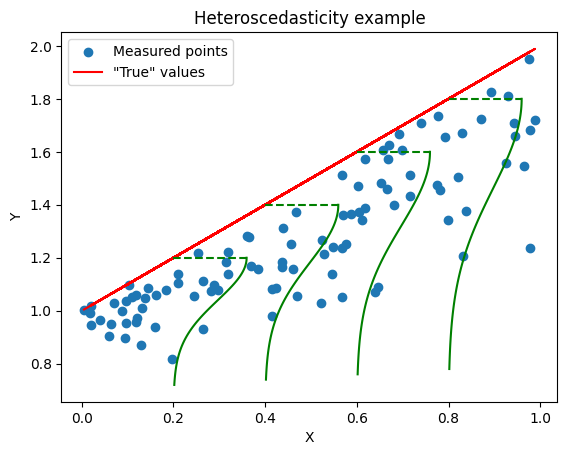

In [ ]:
#|code-fold:true
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

def f(x, k, m):
    return k*x + m

def sigma_f(x):
    return 0.1 + 0.3*x

# Parameters for the half-normal distribution
mu = 0  # mean of the underlying normal distribution

# Generating random data
np.random.seed(0)
N = 100
x = np.random.rand(N)
e = np.array([np.abs(np.random.normal(mu, sigma_f(x[i]))) for i in range(N)])
y_true = f(x, 1, 1)
y = f(x, 1, 1) - e

# Plotting the scatter data and regression line
plt.scatter(x, y, label='Measured points')
plt.plot(x, y_true, color='red', label='"True" values')

# X positions for the PDFs
x_positions = [0.2, 0.4, 0.6, 0.8]

# Generating PDFs for the specified x positions
for xpos in x_positions:
    # Create a range of y values for plotting the PDF
    sigma = sigma_f(xpos)
    y_range = np.linspace(0, 3*sigma, 100)  # Adjusted range for half-normal
    pdf = halfnorm.pdf(y_range, loc=mu, scale=sigma)
    
    # Scaling the PDF to make it visible on the plot, adjust scale factor as needed
    scale_factor = sigma/5
    pdf_scaled = pdf * scale_factor + xpos
    
    # Plotting the PDF
    plt.plot(pdf_scaled, -y_range + f(xpos, 1, 1), color='green')  # Adjusted plotting for half-normal
    
    _xs = np.linspace(xpos, pdf_scaled[0], 100)
    _ys = [f(xpos, 1, 1)] * len(_xs)
    plt.plot(_xs, _ys, '--', color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heteroscedasticity example')
# To avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


## Another potential methodology

Maximising the likelihood function of any of the regression models defined above should yield a regression line that approximates the "true" case rates. The benefit of doing this is that the residual is easy to compute using this intepretation. If $\beta_\text{fit}$ is the fitted model parameters, the residual is compute as

$$
\text{res}_i = f(X_i; \beta_\text{fit}) - Y_i
$$


However, there is an alternative way of going about this where you instead try to use regression to fit the *diagnosis rate*, rather than the true case rate.

The benefit of doing this is that there is no longer any need in principle to use a non-normal error distribution (because the true diagnosis rate may in general be above or lower than the predicted one). The downside is that it is no longer immediately clear how to compute the residual.

If we are fitting the diagnosis rate, rather than just the true rate, we should include socio-econometric data in the independent variable, in addition to physiological variables. So we can write

$$
X_i = (X^\text{P}_i X^\text{SE}_i)
$$

where $X^\text{P}_i$ are the physiological (age, comorbidities, etc) and $X^\text{SE}_i$ the socioeconomic (GP density, deprivation, etc). (Note that $X_i$ is a row vector. if $X^\text{P}_i$ and $X^\text{SE}_i$ are $N$ and $M$-length row vectors respectively, then $X_i$ is an $(N+M)$ row vector)

We can then write the regression model as

$$
\begin{aligned}
Y_i & = X^\text{P}_i \beta^\text{P} + X^\text{SE}_i \beta^\text{SE} + \epsilon_i
\end{aligned}
$$

We would then fit this model and data, and analyse how much the diagnosis rate is explained by the socioeconomic variables. For example, we should (if our hypothesis is correct) see that the predicted diagnosis rate is an increasing function of the density of GPs.

---

Technical note: Since we are adding extra variables that may or may not correlate with the diagnosis rate, we should do some kind of regularisation on the regression (e.g. [ridge](https://en.wikipedia.org/wiki/Ridge_regression) or [lasso](https://en.wikipedia.org/wiki/Lasso_(statistics))), to avoid overfitting.